In [1]:
from scipy import io as scio
import numpy as np
import random
import seaborn as sns

# Load the Data

In [2]:
# Load the data
Xsp = scio.loadmat("ml_1m.mat")['X']

In [3]:
# Convert to COO format
Xsp = Xsp.tocoo(copy=False)

In [4]:
# Mask
M = Xsp != 0

In [5]:
I, J = np.shape(Xsp)
print("row:", I, "col:", J)
N = np.sum(M) # number of non-zero
print("Number of element:",N)
print("Only", round(N * 100 / (I * J), 2), "% of the matrix is full")

row: 3883 col: 6040
Number of element: 1000209
Only 4.26 % of the matrix is full


In [6]:
data, col, row = Xsp.data, Xsp.col, Xsp.row

# Init the factor matrix

In [7]:
K = 10 #set the rank

W = 1 * np.random.randn(I,K)
H = 1 * np.random.randn(K,J)

# Stochastic gradient descent

In [8]:
batchSize = 1024 #the number of elements that we will use at each iteration

eta = 0.01 #step-size
numIter = 500

rmse_sgd = []

for t in range(numIter):
    
    # get a random batch of index from the data
    data_index = random.sample(range(len(data)), batchSize)
    
    # for each element in the data batch, update the corresponding elements in W and H
    for i in data_index:
        
        # for each element in the batch, find its corresponding 'i', 'j',
        # and value by using the Xlist array
        cur_i = row[i]
        cur_j = col[i]
        cur_x = data[i]
        
       
        # compute the current xhat, for the current i and j
        cur_xhat = W[cur_i, :] @ H[:, cur_j]

        # compute the gradients for the 'corresponding elements' of W and H
        # not all the elements of W and H will be updated
        cur_W = W[cur_i, :]
        cur_H = H[:, cur_j]
        O = np.ones((K, K))
        
        grad_w = (cur_x - cur_W @ cur_H) * cur_H.T
        grad_h = cur_W.T * (cur_x - cur_W @ cur_H)
        
        #take a gradient step
        W[cur_i,:] = W[cur_i,:] + eta * grad_w
        H[:,cur_j] = H[:,cur_j] + eta * grad_h
    
    # compute the root-mean-squared error
    error = np.sqrt((Xsp - M.multiply(W.dot(H))).power(2).sum() / N)
    rmse_sgd.append(error)
    print('Iteration',t)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

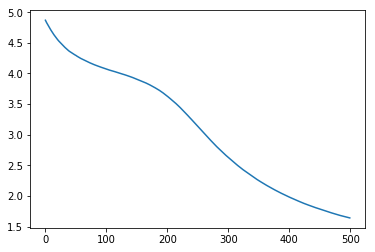

In [9]:
sns.lineplot(y = rmse_sgd, x = range(len(rmse_sgd)))

# Make recommendations

In [10]:
# Compute the predicted X using the estimated W and H matrix
predicted_X = W @ H

user_index = 11

# Use W, H, and M to compute a 'movie_index' for the user
# Get the rating for all movies corresponding to this user
movies = predicted_X[:, user_index].reshape(-1, 1)

# Filter out all movies that are seen by this user
unseen_M = M[:, user_index].toarray()
unseen_movies = unseen_M * movies

# Recommend the unseen movie with largest rating to the current user
recommend_movie_index = np.argmax(unseen_movies)

print('Recommend movie', recommend_movie_index,'to user', user_index)
print("rating", unseen_movies[recommend_movie_index][0])



Recommend movie 1283 to user 11
rating 2.4348559867896706


# Experiments

## Wrap the Stochastic gradient descent into function for future experiment

In [ ]:
def SGD(Xsp, batchSize = 1024, eta = 0.01, numIter = 500, K = 10):
    
    data, col, row = Xsp.data, Xsp.col, Xsp.row
    W = 1 * np.random.randn(I,K)
    H = 1 * np.random.randn(K,J)
    
    rmse_sgd = []

    for t in range(numIter):

        # get a random batch of index from the data
        data_index = random.sample(range(len(data)), batchSize)

        # for each element in the data batch, update the corresponding elements in W and H
        for i in data_index:

            # for each element in the batch, find its corresponding 'i', 'j',
            # and value by using the Xlist array
            cur_i = row[i]
            cur_j = col[i]
            cur_x = data[i]


            # compute the current xhat, for the current i and j
            cur_xhat = W[cur_i, :] @ H[:, cur_j]

            # compute the gradients for the 'corresponding elements' of W and H
            # not all the elements of W and H will be updated
            cur_W = W[cur_i, :]
            cur_H = H[:, cur_j]
            O = np.ones((K, K))

            grad_w = (cur_x - cur_W @ cur_H) * cur_H.T
            grad_h = cur_W.T * (cur_x - cur_W @ cur_H)

            #take a gradient step
            W[cur_i,:] = W[cur_i,:] + eta * grad_w
            H[:,cur_j] = H[:,cur_j] + eta * grad_h

        # compute the root-mean-squared error
        error = np.sqrt((Xsp - M.multiply(W.dot(H))).power(2).sum() / N)
        rmse_sgd.append(error)
    return W, H, rmse_sgd